In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('F:\DS\DataSet\Zomatodataset\zomato.csv', encoding='latin-1')
dfCountry = pd.read_excel('F:\DS\DataSet\Zomatodataset\Country-Code.xlsx')

In [3]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [9]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [10]:
# Checking null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [16]:
df['Country Code'].value_counts()

1      8652
216     434
215      80
189      60
30       60
214      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64

In [18]:
dfCountry.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [36]:
#Merging country names to main dataframe
df = pd.merge(df,dfCountry,on='Country Code',how='left')

In [50]:
df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
South Africa        60
UAE                 60
Brazil              60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Sri Lanka           20
Qatar               20
Canada               4
Name: Country, dtype: int64

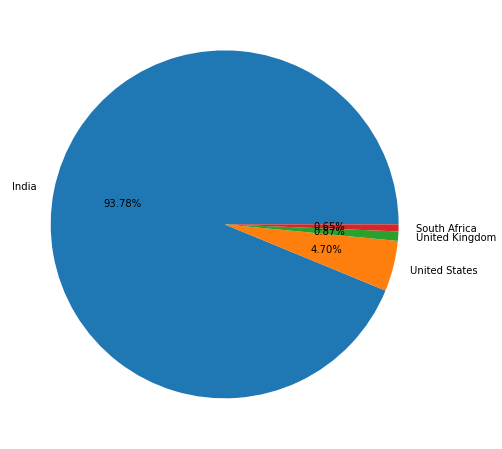

In [71]:
plt.figure(figsize = (15,8))
plt.pie(df['Country'].value_counts()[:4], labels=df['Country'].value_counts().index[:4],autopct='%1.2f%%')
plt.show()

###### Observation : India is the leading user of zomato followed by US and then UK

In [78]:
#Group by Rating Attributes
ratings = df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


###### Observation : 
- Maximum people dont give ratings i.e. 0 rating with white colour.
- 4.5 - 4.9 is Excellent rating with Dark Green colour.
- 4.0 - 4.4 is Very Good rating with Green colour.
- 3.5 - 3.9 is Good rating with Yellow colour.
- 2.5 - 3.4 is Average rating with Orange colour.
- 1.8 - 2.4 is Poor rating with Red Colour.

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

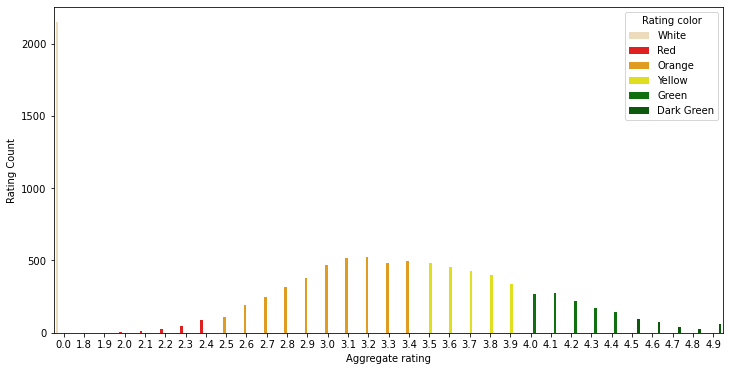

In [87]:
plt.figure(figsize=(12,6))
sns.barplot(x='Aggregate rating',y='Rating Count', hue='Rating color', data = ratings, palette=['wheat','red','orange','yellow','green','darkgreen'])

In [92]:
#Countries not giving ratings
df[df['Aggregate rating'] == 0.0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [101]:
#Countries and their currency
df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:"Count"})

,Country,Currency,Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [113]:
#Countries having online delivery
df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:"Count"})

,Country,Has Online delivery,Count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [133]:
cities_With_onlineDeliveryIndia = df[(df['Country'] == "India")].groupby(['City','Has Online delivery']).size().reset_index().rename(columns={0:"Count"})
cities_With_onlineDeliveryIndia.head()

,City,Has Online delivery,Count
0,Agra,No,20
1,Ahmedabad,No,10
2,Ahmedabad,Yes,11
3,Allahabad,No,20
4,Amritsar,No,21


In [145]:
cities_With_onlineDeliveryIndia.groupby(['City']).size()

City
Agra            1
Ahmedabad       2
Allahabad       1
Amritsar        1
Aurangabad      1
Bangalore       2
Bhopal          1
Bhubaneshwar    1
Chandigarh      2
Chennai         2
Coimbatore      2
Dehradun        1
Faridabad       2
Ghaziabad       2
Goa             1
Gurgaon         2
Guwahati        1
Hyderabad       2
Indore          1
Jaipur          2
Kanpur          1
Kochi           2
Kolkata         2
Lucknow         1
Ludhiana        1
Mangalore       1
Mohali          1
Mumbai          2
Mysore          1
Nagpur          2
Nashik          1
New Delhi       2
Noida           2
Panchkula       1
Patna           1
Puducherry      1
Pune            2
Ranchi          1
Secunderabad    2
Surat           1
Vadodara        1
Varanasi        1
Vizag           1
dtype: int64